<a href="https://colab.research.google.com/github/nakampany/kaggle_titanic/blob/main/2_titanic_GCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **タイタニック号生存者の予測**
「ランダムフォレスト」という機械学習のアルゴリズムにより、タイタニック号の生存者を予測する。

# 'Name' 'Ticket' 'Cabin' を数値化した

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ｄｆ_train = pd.read_csv('train.csv')
ｄｆ_test = pd.read_csv('test.csv')

# 結果の提出時に使用する
test_id = df_test['PassengerId']

ｄｆ_train.head(10)

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,1,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,1,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
print(ｄｆ_train.shape)
print(ｄｆ_test.shape)

(891, 12)
(418, 11)


In [ ]:
ｄｆ_train.info()
ｄｆ_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Perished     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

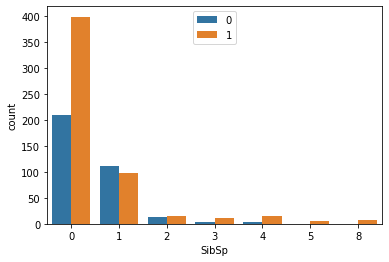

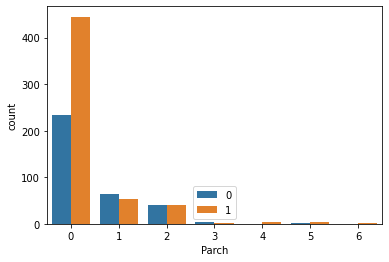

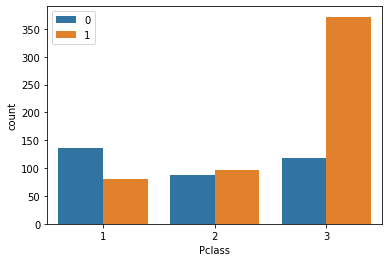

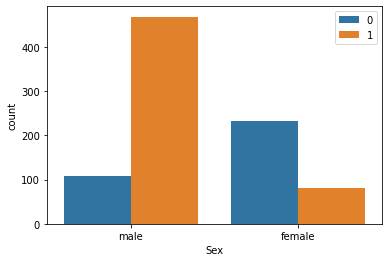

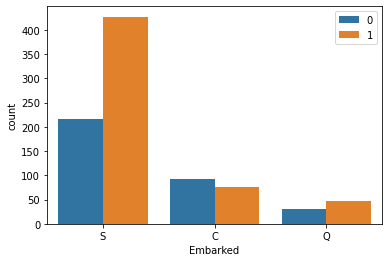

In [ ]:

label_1 = ["SibSp", "Parch", "Pclass", "Sex", "Embarked"]

for label in label_1:
  sns.countplot(x=label, hue="Perished", data=ｄｆ_train)
  plt.legend()
  plt.show()

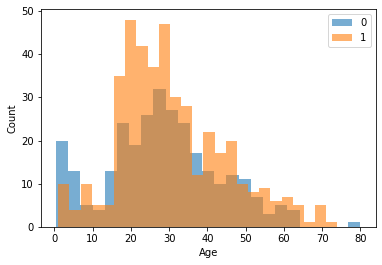

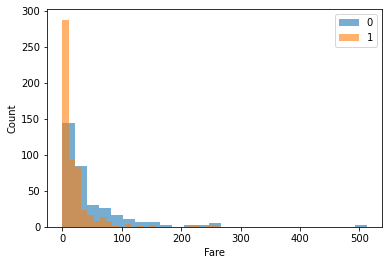

In [ ]:
bins = 25  # 棒の数
alpha = 0.6  # 棒の透明度

label_2 = ["Age", "Fare"]

# 棒グラフの描画
for i in label_2:

  plt.hist(ｄｆ_train.loc[ｄｆ_train["Perished"] == 0, i].dropna(), bins=bins, alpha=alpha, label="0")  # 生存
  plt.hist(ｄｆ_train.loc[ｄｆ_train["Perished"] == 1, i].dropna(), bins=bins, alpha=alpha, label="1")  # 死亡

  # 軸ラベル
  plt.xlabel(i)
  plt.ylabel("Count")

  plt.legend()
  plt.show()

In [ ]:
data = pd.concat([df_train, df_test], sort = False)
data

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,0.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# change_labels = ["Sex", "Embarked"]  
# train_data = pd.get_dummies(df_train, columns=change_labels)
# test_data = pd.get_dummies(df_test, columns=change_labels)

data['Sex'].replace(['male','female'], [0, 1], inplace = True)
data['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 1309, dtype: int64

In [ ]:
data['Embarked'].fillna(('S'), inplace = True)
data['Embarked'] = data['Embarked'].map({'S': 0,'C': 1,'Q': 2, })
data['Embarked']

0      0
1      1
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Embarked, Length: 1309, dtype: int64

In [ ]:
# 欠損値を埋める
data["Fare"].fillna(data["Fare"].mean(), inplace=True)
data["Age"].fillna(data["Age"].mean(), inplace=True)

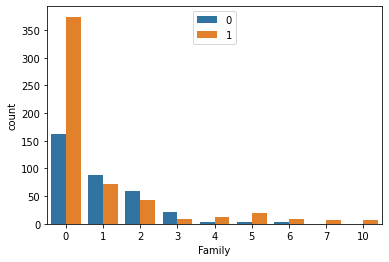

In [ ]:
data["Family"] = data["Parch"] + data["SibSp"]

ｄｆ_train["Family"] = data["Family"][:len(ｄｆ_train)]
ｄｆ_test["Family"] = data["Family"][len(ｄｆ_train):]

sns.countplot(x="Family", data=ｄｆ_train, hue="Perished")
plt.legend()
plt.show()

In [ ]:
combine1 = [data]

for train in combine1: 
        train['Salutation'] = train.Name.str.extract(' ([A-Za-z]+).', expand=False) 
for train in combine1: 
        train['Salutation'] = train['Salutation'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        train['Salutation'] = train['Salutation'].replace('Mlle', 'Miss')
        train['Salutation'] = train['Salutation'].replace('Ms', 'Miss')
        train['Salutation'] = train['Salutation'].replace('Mme', 'Mrs')
        del train['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 
for train in combine1: 
        train['Salutation'] = train['Salutation'].map(Salutation_mapping) 
        train['Salutation'] = train['Salutation'].fillna(0)

In [ ]:
for train in combine1: 
        train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])
        train['Ticket_Lett'] = train['Ticket_Lett'].apply(lambda x: str(x)) 
        train['Ticket_Lett'] = np.where((train['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), train['Ticket_Lett'], np.where((train['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0')) 
        train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x)) 
        del train['Ticket'] 
train['Ticket_Lett']=train['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3)


In [ ]:
for train in combine1: 
    train['Cabin_Lett'] = train['Cabin'].apply(lambda x: str(x)[0]) 
    train['Cabin_Lett'] = train['Cabin_Lett'].apply(lambda x: str(x)) 
    train['Cabin_Lett'] = np.where((train['Cabin_Lett']).isin([ 'F', 'E', 'D', 'C', 'B', 'A']),train['Cabin_Lett'], np.where((train['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0'))
del train['Cabin'] 
train['Cabin_Lett']=train['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1)

In [ ]:
data

,PassengerId,Perished,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett
0,1,1.0,3,0,22.000000,1,0,7.2500,0,1,1.0,3,9,0
1,2,0.0,1,1,38.000000,1,0,71.2833,1,1,3.0,0,8,1
2,3,0.0,3,1,26.000000,0,0,7.9250,0,0,2.0,3,16,0
3,4,0.0,1,1,35.000000,1,0,53.1000,0,1,3.0,1,6,1
4,5,1.0,3,0,35.000000,0,0,8.0500,0,0,1.0,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,0,29.881138,0,0,8.0500,0,0,1.0,3,9,0
414,1306,NaN,1,1,39.000000,0,0,108.9000,1,0,0.0,0,8,1
415,1307,NaN,3,0,38.500000,0,0,7.2500,0,0,1.0,3,18,0
416,1308,NaN,3,0,29.881138,0,0,8.0500,0,0,1.0,3,6,0


In [ ]:
# 不要な特徴量の削除
data.drop(["PassengerId", "SibSp", "Parch"],
          axis=1, inplace=True)

In [ ]:
data

,Perished,Pclass,Sex,Age,Fare,Embarked,Family,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett
0,1.0,3,0,22.000000,7.2500,0,1,1.0,3,9,0
1,0.0,1,1,38.000000,71.2833,1,1,3.0,0,8,1
2,0.0,3,1,26.000000,7.9250,0,0,2.0,3,16,0
3,0.0,1,1,35.000000,53.1000,0,1,3.0,1,6,1
4,1.0,3,0,35.000000,8.0500,0,0,1.0,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,0,29.881138,8.0500,0,0,1.0,3,9,0
414,NaN,1,1,39.000000,108.9000,1,0,0.0,0,8,1
415,NaN,3,0,38.500000,7.2500,0,0,1.0,3,18,0
416,NaN,3,0,29.881138,8.0500,0,0,1.0,3,6,0


In [ ]:
# 入力と正解の作成
train_data = data[:len(df_train)]
test_data = data[len(train_data):]
t_train = train_data["Perished"]  # 正解
x_train = train_data.drop("Perished", axis=1)  # 訓練時の入力
x_test = test_data.drop("Perished", axis=1)  # テスト時の入力

x_train

,Pclass,Sex,Age,Fare,Embarked,Family,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett
0,3,0,22.000000,7.2500,0,1,1.0,3,9,0
1,1,1,38.000000,71.2833,1,1,3.0,0,8,1
2,3,1,26.000000,7.9250,0,0,2.0,3,16,0
3,1,1,35.000000,53.1000,0,1,3.0,1,6,1
4,3,0,35.000000,8.0500,0,0,1.0,3,6,0
...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,13.0000,0,0,5.0,2,6,0
887,1,1,19.000000,30.0000,0,0,2.0,1,6,2
888,3,1,29.881138,23.4500,0,3,2.0,0,10,0
889,1,0,26.000000,30.0000,1,0,1.0,1,6,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

model.fit(x_train, t_train)
y_test = model.predict(x_test)

In [ ]:
score = model.score(x_train, t_train)
acc_random_forest = round(score * 100, 2)
acc_random_forest

89.56

In [ ]:
y_test = model.predict(x_test).astype(int)

# 形式を整える
survived_test = pd.Series(y_test, name="Perished")
subm_data = pd.concat([test_id, survived_test], axis=1)

# 提出用のcsvファイルを保存
subm_data.to_csv("submission_titanic.csv", index=False)

subm_data

,PassengerId,Perished
0,892,1
1,893,1
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,0
415,1307,1
416,1308,1
